In [5]:
# Use decision trees to classify the data/climate_change_and_conservative_subreddit_comments_vectorized.csv dataset
# into two classes: "conservative" and "climate_change".


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('data/climate_change_and_conservative_subreddit_comments_vectorized.csv')


               precision    recall  f1-score   support

climatechange       0.14      0.14      0.14        21
 conservative       0.00      0.00      0.00        19

     accuracy                           0.07        40
    macro avg       0.07      0.07      0.07        40
 weighted avg       0.07      0.07      0.07        40



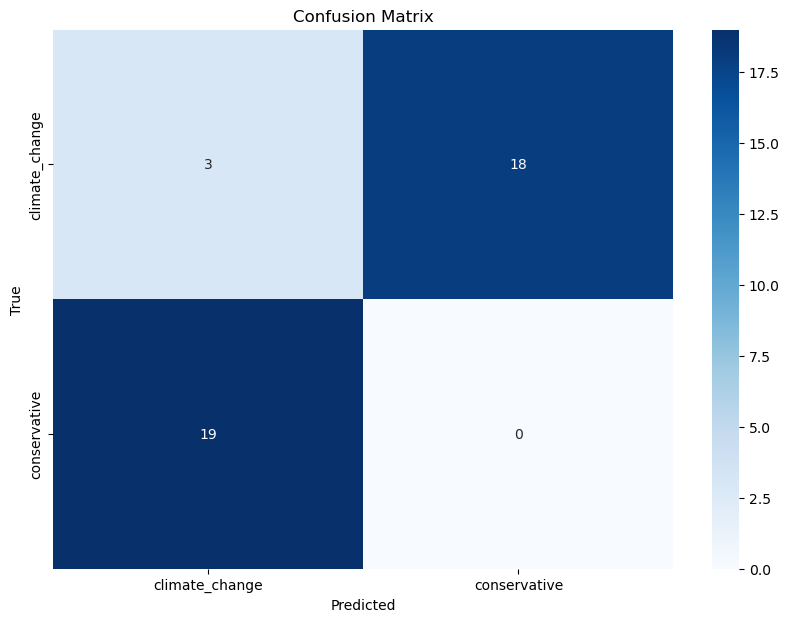

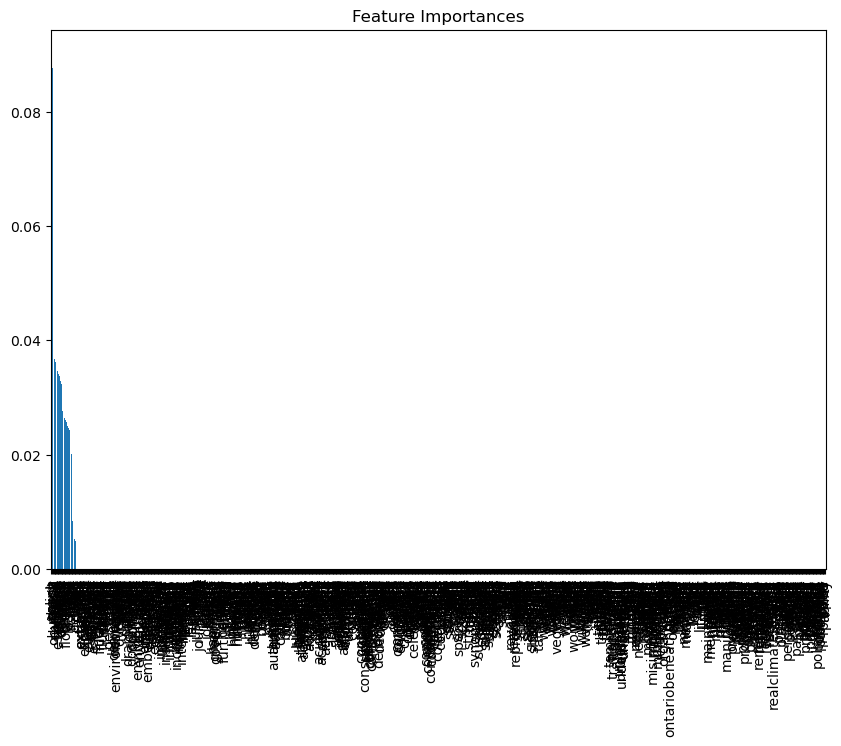

Feature importances:
policy: 0.08986795559160782
graph: 0.0876183687866022
recent: 0.06186501632278896
thank: 0.06028883756297275
obviously: 0.03663791984054994
christian: 0.036125501381240537
does: 0.03562375830650158
original: 0.035132396122963476
believed: 0.03465113042264837
estimated: 0.034179686471320934
existing: 0.033717798816302505
world: 0.033265210912727286
alarmist: 0.032821674767224855
went: 0.03238695059812296
desantis: 0.027674828091310447
sweaty: 0.027258665262868912
took: 0.02685181951267746
entirety: 0.026454014779156338
yea: 0.026064985150051193
process: 0.025684474417933433
flourished: 0.025312235658252778
noaa: 0.024948030828637623
packed: 0.024591630388229476
sense: 0.02424281293591345
clean: 0.024114544084400884
science: 0.020095453403667404
sub: 0.020095453403667404
isn: 0.008450138156241804
post: 0.008063108927712276
work: 0.005766521411486895
yes: 0.0052859779605301666
deleted: 0.004863099723687808
doesn: 0.0
diddly: 0.0
fast: 0.0
fake: 0.0
fact: 0.0
didnt: 0.

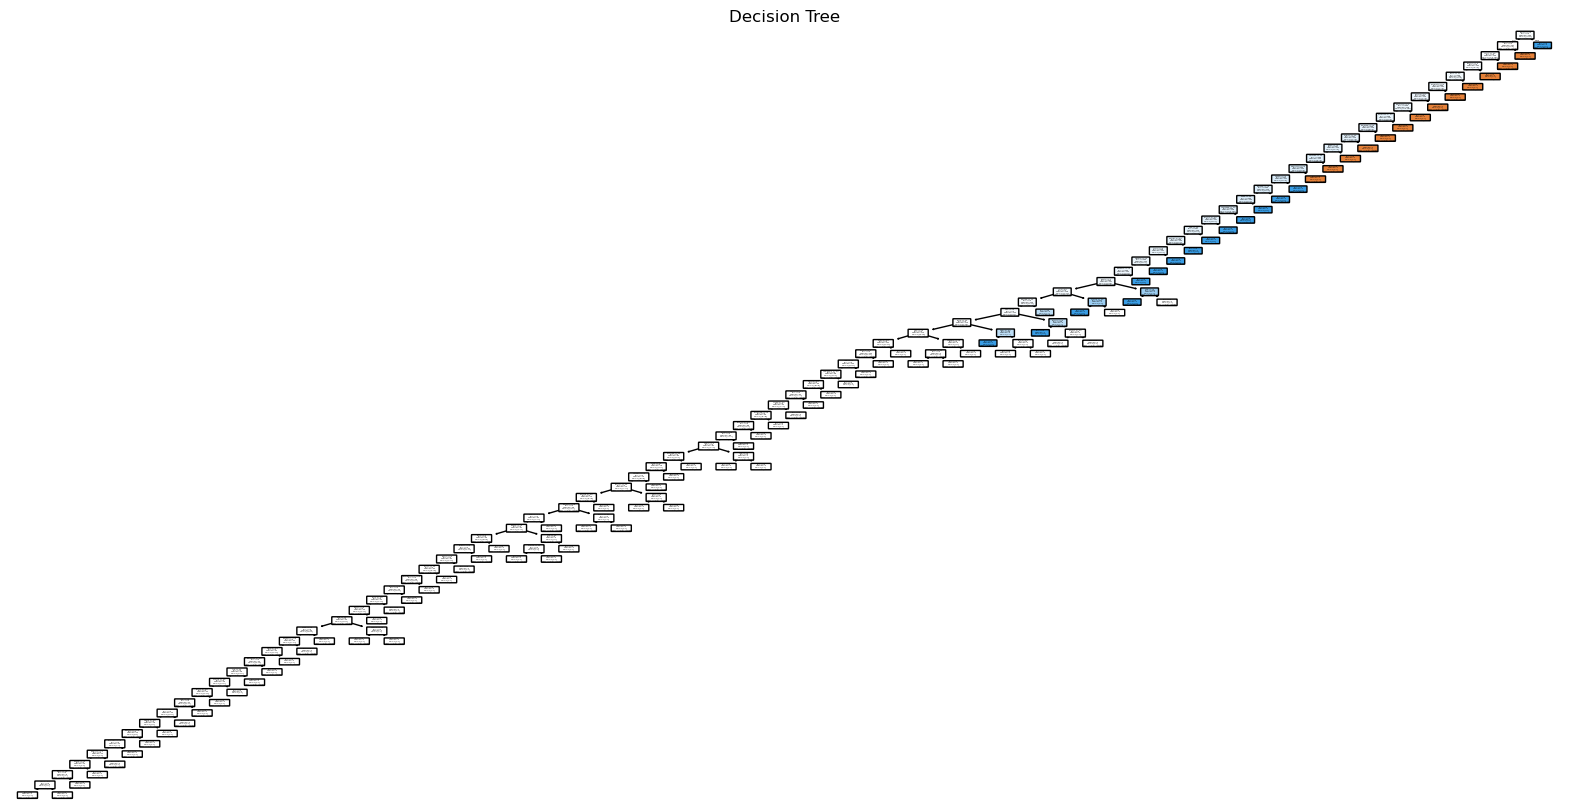

In [13]:
# Decision Tree Classifier

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['climate_change', 'conservative'], yticklabels=['climate_change', 'conservative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Feature Importance
importances = clf.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 7))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
print("Feature importances:")
for i in range(X.shape[1]):
    print(f"{X.columns[indices[i]]}: {importances[indices[i]]}")
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))

plot_tree(clf, filled=True, feature_names=X.columns, class_names=['climate_change', 'conservative'], rounded=True)
plt.title('Decision Tree')
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



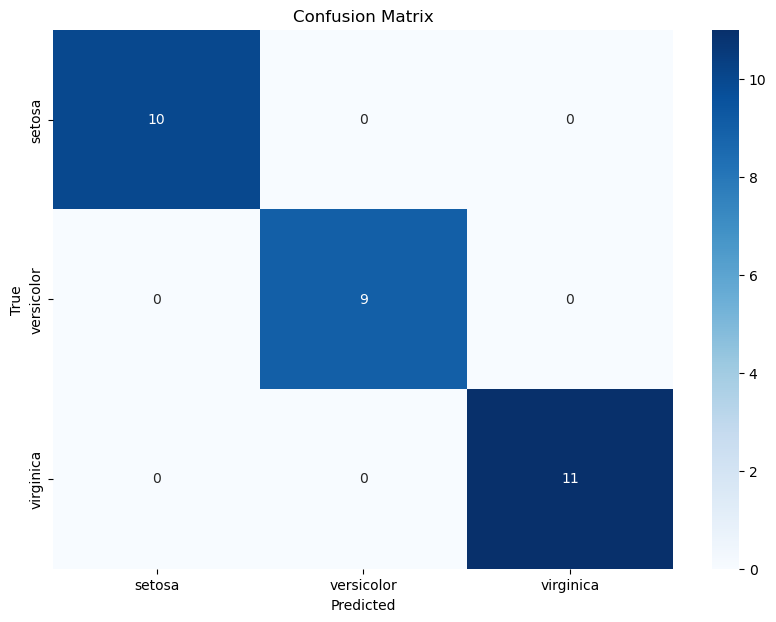

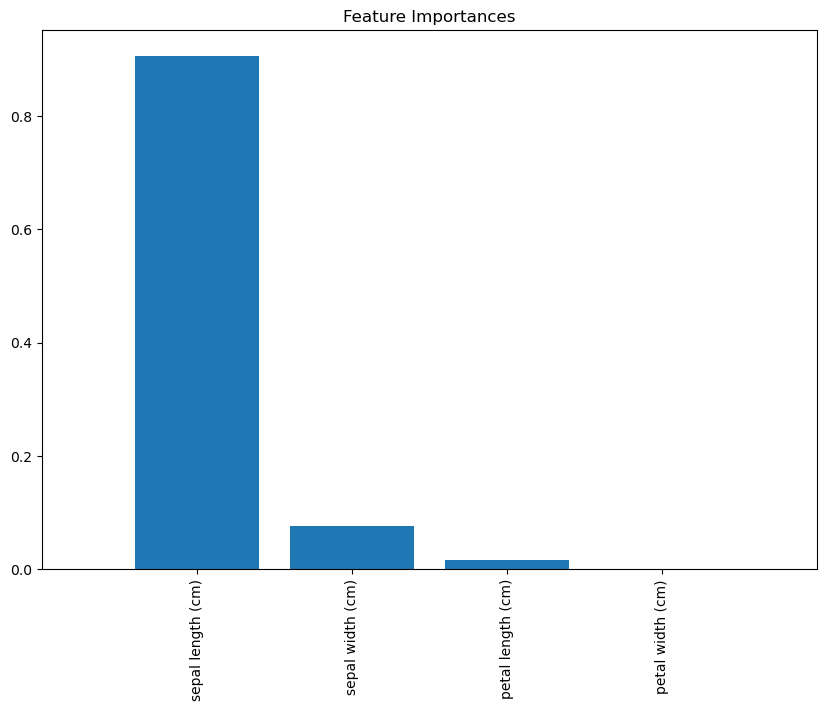

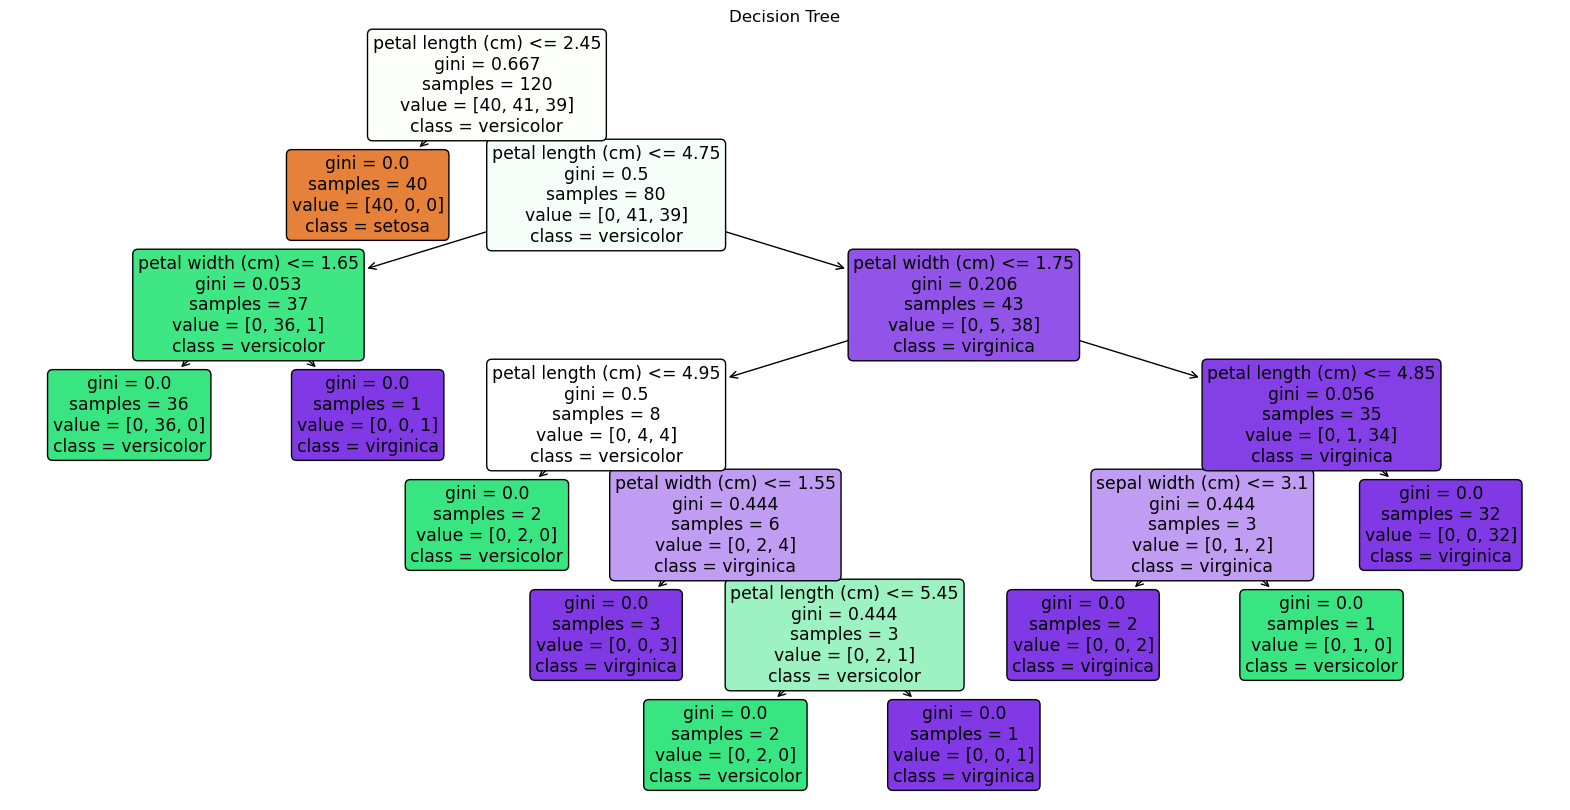

In [9]:
### Import data from iris dataset use decision trees to classify the data into three classes: "setosa", "versicolor" and "virginica"

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
# Fit the classifier to the training data
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = clf.predict(X_test)
# Print the classification report

print(classification_report(y_test, y_pred))
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Feature Importance
importances = clf.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 7))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), iris.feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title('Decision Tree')
plt.show()